In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import csv

torch.set_printoptions(edgeitems=2, linewidth=75)

In [12]:
wine_path = "C:/Navneet/College/datascience/pytorch/dlwpt-code/data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, delimiter=";", skiprows=1)
wineq_numpy.shape

(4898, 12)

In [11]:
col_list = next(csv.reader(open(wine_path, "r"), delimiter=";"))
len(col_list)

output_tensor = torch.tensor(col_list)
output_tensor

ValueError: too many dimensions 'str'

In [13]:
input_data = wineq_numpy[:,:-1]
output_data = wineq_numpy[:,-1]

In [14]:
wineq_tensor = torch.tensor(input_data, dtype=torch.float)
wineq_tensor

tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
        ...,
        [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]])

In [15]:
n_samples = wineq_tensor.shape[0]
n_val = int(n_samples*0.2)

shuffle = torch.randperm(n_samples)

train_indices = shuffle[:-n_val]
val_indices = shuffle[-n_val:]

train_indices.shape,val_indices.shape

(torch.Size([3919]), torch.Size([979]))

In [25]:
output_data.shape

(4898,)

In [26]:
output_tensor = torch.zeros(n_samples,10)
output_tensor.scatter_(1, torch.tensor(output_data, dtype=torch.int64).unsqueeze_(1), 1)

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [28]:
output_tensor[0], output_data[0]

(tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 6.0)

In [29]:
wineq_train = wineq_tensor[train_indices]
output_train = output_tensor[train_indices]
wineq_val = wineq_tensor[val_indices]
output_val = output_tensor[val_indices]

In [30]:
from collections import OrderedDict

In [40]:
model = nn.Sequential(OrderedDict([
    ('hidden layer', nn.Linear(11, 10)),
    ('hidden activation', nn.Softmax(1)),
    ('output layer', nn.Linear(10, 10)),
]))
model

Sequential(
  (hidden layer): Linear(in_features=11, out_features=10, bias=True)
  (hidden activation): Softmax(dim=1)
  (output layer): Linear(in_features=10, out_features=10, bias=True)
)

In [41]:
for name, param in model.named_parameters():
    print(name, param.shape)

hidden layer.weight torch.Size([10, 11])
hidden layer.bias torch.Size([10])
output layer.weight torch.Size([10, 10])
output layer.bias torch.Size([10])


In [42]:
optimizer = optim.Adam(model.parameters(),lr=1e-3)

In [43]:
def training_loop(n_epochs,model,optimizer,loss_fn,inp_train,out_train,inp_val,out_val):
    for epoch in range(1,n_epochs+1):
        pred_train = model(inp_train)
        pred_loss = loss_fn(pred_train,out_train)

        pred_val = model(inp_val)
        pred_val_loss = loss_fn(pred_val,out_val)

        optimizer.zero_grad()
        pred_loss.backward()
        optimizer.step()

        if epoch==1 or epoch % 10 == 0:
            print("Epoch:", epoch, "Train loss:", pred_loss.item(), "Val loss:", pred_val_loss.item())
    return model

In [45]:
finalmodel = training_loop(1000,model,optimizer,nn.CrossEntropyLoss(),wineq_train,output_train,wineq_val,output_val)

Epoch: 1 Train loss: 1.2445429563522339 Val loss: 1.2496105432510376
Epoch: 10 Train loss: 1.2432286739349365 Val loss: 1.2483487129211426
Epoch: 20 Train loss: 1.2417892217636108 Val loss: 1.246720790863037
Epoch: 30 Train loss: 1.240376591682434 Val loss: 1.2451210021972656
Epoch: 40 Train loss: 1.238988995552063 Val loss: 1.2435845136642456
Epoch: 50 Train loss: 1.2376246452331543 Val loss: 1.2420862913131714
Epoch: 60 Train loss: 1.2362834215164185 Val loss: 1.2406145334243774
Epoch: 70 Train loss: 1.2349646091461182 Val loss: 1.239159345626831
Epoch: 80 Train loss: 1.2336676120758057 Val loss: 1.237716555595398
Epoch: 90 Train loss: 1.2323919534683228 Val loss: 1.2363086938858032
Epoch: 100 Train loss: 1.2311370372772217 Val loss: 1.234913945198059
Epoch: 110 Train loss: 1.2299026250839233 Val loss: 1.2335399389266968
Epoch: 120 Train loss: 1.2286921739578247 Val loss: 1.232116937637329
Epoch: 130 Train loss: 1.227510690689087 Val loss: 1.231060266494751
Epoch: 140 Train loss: 1.2

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(output_data[train_indices],finalmodel(wineq_train).argmax(1).unsqueeze(1).numpy())

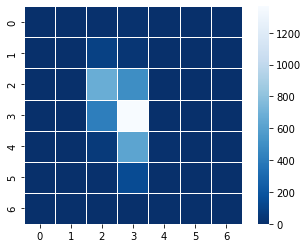

In [75]:
import seaborn as sns
sns.heatmap(cm, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');